[![Open in Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/iLampard/EasyTemporalPointProcess/blob/main/notebooks/easytpp_1_dataset.ipynb)

# Tutorial 1: Dataset in EasyTPP

In this tutorial, we’ll explore the dataset-related functionalities in **EasyTPP**, an advanced library designed for temporal point process modeling. We will guide you through the installation process, data loading options, and configurations to set up a training pipeline effectively.


## Step 1: Install EasyTPP
First, let’s install the EasyTPP package. Run the following command to install the library in your Colab environment:

In [ ]:
# ues the latest release
# !pip install easy_tpp

# or use the git main branch
!pip install git+https://github.com/ant-research/EasyTemporalPointProcess.git

  Cloning https://github.com/ant-research/EasyTemporalPointProcess.git to /tmp/pip-req-build-ddqktd57
  Running command git clone --filter=blob:none --quiet https://github.com/ant-research/EasyTemporalPointProcess.git /tmp/pip-req-build-ddqktd57
  Resolved https://github.com/ant-research/EasyTemporalPointProcess.git to commit de2eef65c9ee66c1dff8dc12d8bef7de270db86f
  Preparing metadata (setup.py) ... done


## Step 2: Loading Preprocessed Datasets

EasyTPP provides two methods to load preprocessed datasets:
- [Google Drive](https://drive.google.com/drive/folders/1f8k82-NL6KFKuNMsUwozmbzDSFycYvz7): Download the dataset in pickle format.
- [HuggingFace](https://huggingface.co/easytpp): Load the dataset in JSON format from the HuggingFace repository.

> Note: The pickle format from Google Drive will be deprecated in future releases, and we recommend using the JSON files from HuggingFace for better compatibility and performance.


### Option 1: Load Pickle Data Files (Deprecated Soon)
If you choose to use the pickle files, muanlly download the data files fromt he Google Drive mentioned above, place them under a data directory in your workspace, and specify the directory path in the configuration file.

Here is an example configuration for loading a Taxi dataset in pickle format:



```
data:
  taxi:
    data_format: pickle
    train_dir:  ./data/taxi/train.pkl
    valid_dir:  ./data/taxi/dev.pkl
    test_dir:  ./data/taxi/test.pkl
```

Then we can launch the train/evaluation pipeline process. See [experiment_config](https://github.com/ant-research/EasyTemporalPointProcess/blob/main/examples/configs/experiment_config.yaml) for the full example.



### Option 2: Load JSON Data Files (Recommended)

To use JSON data files from HuggingFace - [EasyTPP Repo](https://huggingface.co/easytpp), simply replace `data_format: pickle` with `data_format: json` in the config file,  and update the directory paths accordingly. This setup is recommended for newer versions of EasyTPP and provides better compatibility with various processing functions in the library.

To activate this loading process in the train/evaluation pipeline, similarly, we put the directory of huggingface repo in the config file, e.g.,

```
data:
  taxi:
    data_format: json
    train_dir:  easytpp/taxi
    valid_dir:  easytpp/taxi
    test_dir:  easytpp/taxi
```

Note that we can also manually put the locally directory of json files in the config:

```
data:
  taxi:
    data_format: json
    train_dir:  ./data/taxi/train.json
    valid_dir:  ./data/taxi/dev.json
    test_dir:  ./data/taxi/test.json
```

## Step 3: Exploring Datasets

The EasyTPP library offers several functions to streamline dataset loading and preprocessing. Let’s go over a few key functionalities:

### Dataset Properties

We firstly use the official HuggingFace APIs to directly download and inspect the dataset.

In this example, the `load_dataset` function is used to load the "taxi" dataset, which is relatively small and suited for quick testing. The dataset is automatically split into three parts: train, validation, and test, with each split containing structured information on the events.

In [ ]:
from datasets import load_dataset

# we choose taxi dataset as it is relatively small
dataset = load_dataset('easytpp/taxi')

/usr/local/lib/python3.10/dist-packages/huggingface_hub/utils/_token.py:89: UserWarning: 
The secret `HF_TOKEN` does not exist in your Colab secrets.
To authenticate with the Hugging Face Hub, create a token in your settings tab (https://huggingface.co/settings/tokens), set it as secret in your Google Colab and restart your session.
You will be able to reuse this secret in all of your notebooks.
Please note that authentication is recommended but still optional to access public models or datasets.
  warnings.warn(


README.md:   0%|          | 0.00/28.0 [00:00<?, ?B/s]

train.json:   0%|          | 0.00/2.29M [00:00<?, ?B/s]

dev.json:   0%|          | 0.00/327k [00:00<?, ?B/s]

test.json:   0%|          | 0.00/654k [00:00<?, ?B/s]

Generating train split:   0%|          | 0/1400 [00:00<?, ? examples/s]

Generating validation split:   0%|          | 0/200 [00:00<?, ? examples/s]

Generating test split:   0%|          | 0/400 [00:00<?, ? examples/s]

Each dataset split is a Dataset object with multiple features such as `seq_len `(sequence length), `time_since_start`, `seq_idx` (sequence index), `time_since_last_event`, `type_event` (event type), and `dim_process` (dimension of the process). This structured format provides essential information about each event's timing and type, which is crucial for modeling temporal point processes. Additionally, the package simplifies data access, allowing users to select specific splits and features for further analysis or model input with minimal setup.

In [ ]:
dataset

DatasetDict({
    train: Dataset({
        features: ['seq_len', 'time_since_start', 'seq_idx', 'time_since_last_event', 'type_event', 'dim_process'],
        num_rows: 1400
    })
    validation: Dataset({
        features: ['seq_len', 'time_since_start', 'seq_idx', 'time_since_last_event', 'type_event', 'dim_process'],
        num_rows: 200
    })
    test: Dataset({
        features: ['seq_len', 'time_since_start', 'seq_idx', 'time_since_last_event', 'type_event', 'dim_process'],
        num_rows: 400
    })
})

In the easytpp dataset, the `type_event` feature represents the event type codes within each sequence. In the example shown, `dataset['train']['type_event'][0]` reveals a list of integer codes, such as [8, 3, 8, 3, 8, 3, ...], corresponding to different types of events in the first sequence of the training set. These codes are likely categorical identifiers used to differentiate various types of events in the temporal point process, which can be useful in understanding event dynamics and patterns over time. This feature enables the model to learn and predict not only the timing but also the type of future events within the sequence.

In [ ]:
dataset['train']['type_event'][0]

[8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3,
 8,
 3]

### Dataset Distributions

In the following code snippet, several functions from the EasyTPP package are used to configure and analyze a TPP dataset, providing insights into event distribution and timing characteristics.

#### Dataset Configuration

The `Config.build_from_yaml_file` function loads configurations from a specified YAML file (`config.yaml`). This file contains settings for data preprocessing, model parameters, and other configurations needed by the `TPPDataLoader` to manage and process the TPP data. By centralizing settings in a configuration file, this function allows for easier parameter management and adjustments without altering the code.

In [11]:
# As an illustrative example, we write the YAML content to a file
yaml_content = """
pipeline_config_id: data_config

data_format: json
train_dir: easytpp/taxi  # ./data/taxi/train.json
valid_dir: easytpp/taxi  # ./data/taxi/dev.json
test_dir: easytpp/taxi   # ./data/taxi/test.json
data_specs:
  num_event_types: 10
  pad_token_id: 10
  padding_side: right
"""

# Save the content to a file named config.yaml
with open("config.yaml", "w") as file:
    file.write(yaml_content)

In [12]:
from easy_tpp.config_factory import Config
from easy_tpp.preprocess.data_loader import TPPDataLoader


config = Config.build_from_yaml_file('./config.yaml')
tpp_loader = TPPDataLoader(config)

2024-10-29 07:33:39,927 - config.py[pid:253;line:34:build_from_yaml_file] - CRITICAL: Load pipeline config class DataConfig


#### Dataset Statistics


The `get_statistics` function retrieves statistical information about the dataset,
such as the distribution of event types, sequence lengths, and timing intervals. By specifying `split='train'`, this function targets only the training subset of the dataset. The resulting stats variable is printed to provide an overview of the dataset's
structure and characteristics, which can be helpful for understanding the data before model training.

In [13]:
stats = tpp_loader.get_statistics(split='train')
stats

{'num_sequences': 1400,
 'avg_sequence_length': 37.03857142857143,
 'event_type_distribution': {8: 23131,
  3: 22239,
  5: 2161,
  0: 2088,
  1: 1443,
  6: 625,
  4: 107,
  2: 50,
  9: 4,
  7: 6},
 'max_sequence_length': 38,
 'min_sequence_length': 36,
 'mean_time_delta': 0.21851826495759416,
 'min_time_delta': 0.0,
 'max_time_delta': 5.721388888888889}

#### Event Type Distribution Plot

The following function generates a plot of the distribution of event types within the dataset. This visualization helps identify the frequency of different event types, which can be useful for analyzing class imbalance or the prevalence of certain types of events. Understanding event type distribution is essential for TPP models, as it informs the model about the likelihood and variety of event types.

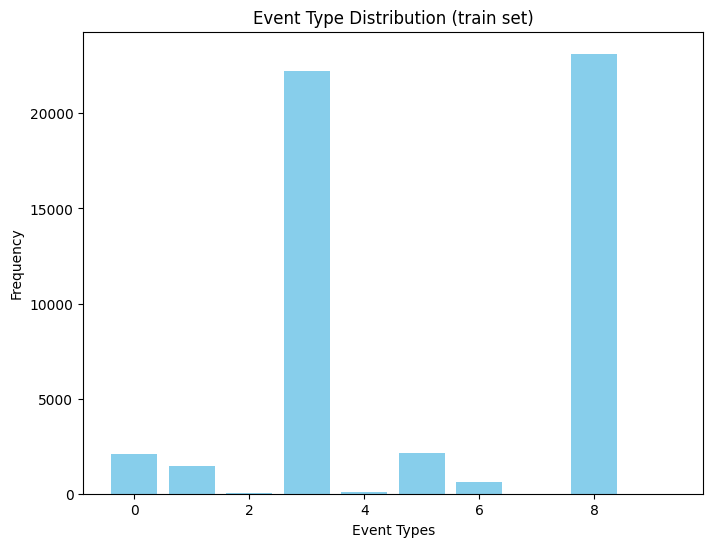

In [14]:
tpp_loader.plot_event_type_distribution()

#### Event Delta Time Distribution Plot


The `plot_event_delta_times_distribution` function visualizes the distribution of time intervals between consecutive events (delta times) in the dataset. This plot provides insights into the temporal patterns of events, such as whether they occur at regular intervals or vary widely. Understanding delta time distribution is crucial for TPP models since these patterns directly affect how the model learns to predict the timing of future events.

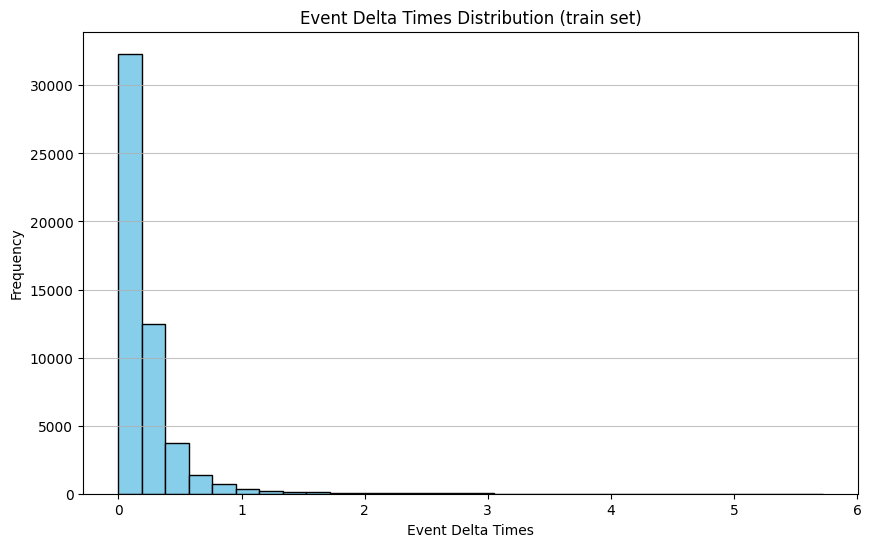

In [15]:
tpp_loader.plot_event_delta_times_distribution()